In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


Epoch 1/30


/Users/simranbirkaur/Python_Miniconda/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 862ms/step - accuracy: 0.0480 - loss: 2.9150 - val_accuracy: 0.0769 - val_loss: 2.7908
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 783ms/step - accuracy: 0.1550 - loss: 2.7557 - val_accuracy: 0.0769 - val_loss: 2.7929
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 751ms/step - accuracy: 0.2300 - loss: 2.7035 - val_accuracy: 0.1154 - val_loss: 2.7932
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 752ms/step - accuracy: 0.3163 - loss: 2.4968 - val_accuracy: 0.1923 - val_loss: 2.5760
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 748ms/step - accuracy: 0.5785 - loss: 1.6201 - val_accuracy: 0.6923 - val_loss: 1.4821
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 780ms/step - accuracy: 0.7621 - loss: 0.8326 - val_accuracy: 0.7308 - val_loss: 0.8579
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 833ms/step - accuracy: 0.8611 - loss: 0.4966 - val_accuracy: 0.7692 - val_loss: 0.7286
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 760ms/step - accuracy: 0.8795 - loss: 0.3680 - val_accuracy: 0.8077 - val_loss: 0.9425
Ep

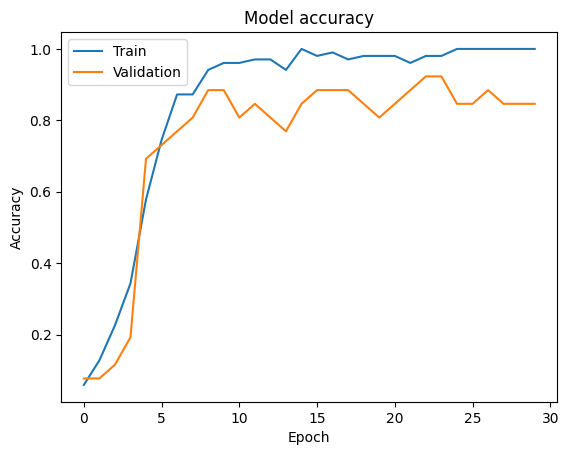

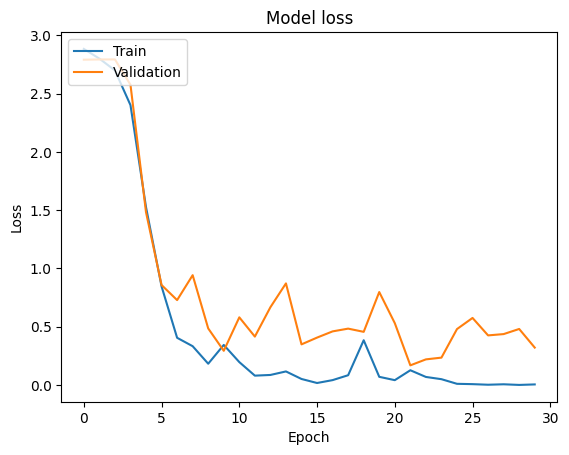

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
Accuracy: 0.96875


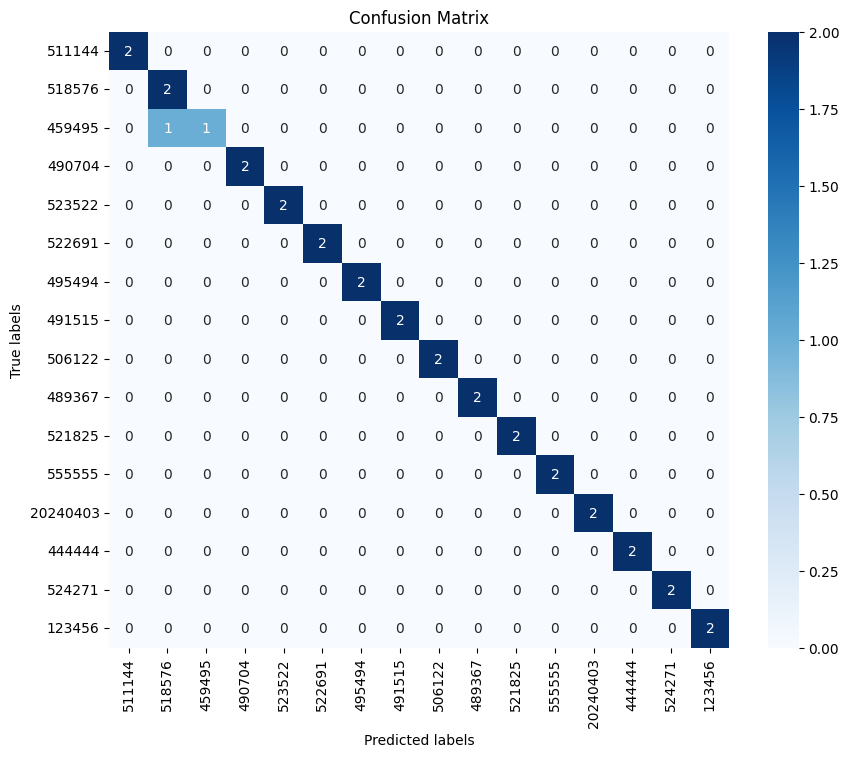

Classification Report:
              precision    recall  f1-score   support

      511144       1.00      1.00      1.00         2
      518576       0.67      1.00      0.80         2
      459495       1.00      0.50      0.67         2
      490704       1.00      1.00      1.00         2
      523522       1.00      1.00      1.00         2
      522691       1.00      1.00      1.00         2
      495494       1.00      1.00      1.00         2
      491515       1.00      1.00      1.00         2
      506122       1.00      1.00      1.00         2
      489367       1.00      1.00      1.00         2
      521825       1.00      1.00      1.00         2
      555555       1.00      1.00      1.00         2
    20240403       1.00      1.00      1.00         2
      444444       1.00      1.00      1.00         2
      524271       1.00      1.00      1.00         2
      123456       1.00      1.00      1.00         2

    accuracy                           0.97        32
   

In [7]:
import joblib
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

class FaceRecognitionCNN:
    def __init__(self, images_folder):
        self.images_folder = images_folder
        self.labels_dict = {}
        self.model = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.num_classes = None

    def _load_images_and_labels(self):
        images = []
        labels = []
        label = 0
        for root, dirs, files in os.walk(self.images_folder):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    image_path = os.path.join(root, file)
                    img = cv2.imread(image_path)
                    img = cv2.resize(img, (250, 250))  # Resize image to 250x250
                    images.append(img)
                    labels.append(os.path.basename(root))  # Label is the folder name
            self.labels_dict[label] = os.path.basename(root)
            label += 1
        self.labels_dict.pop(0, None)
        return images, labels
    
    def _preprocess_data(self, images, labels):
        le = LabelEncoder()
        labels_encoded = le.fit_transform(labels)
        self.num_classes = len(le.classes_)
        images = np.array(images)
        labels_encoded = to_categorical(labels_encoded, self.num_classes)  # Convert labels to one-hot encoding       
        return images, labels_encoded
    
    def build_model(self):
        self.model = Sequential([
            tf.keras.layers.Rescaling(1./255), # Normalizing pixel values
            Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(64, (2, 2), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(256, activation='relu'),
            Dropout(0.2),
            Dense(self.num_classes, activation='softmax')
        ]) 
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    def train(self, test_size=0.2, epochs=30, batch_size=10):
        images, labels = self._load_images_and_labels()
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            images, labels, test_size=test_size, random_state=42, stratify=labels)
        self.X_train, self.y_train = self._preprocess_data(self.X_train, self.y_train)
        self.X_test, self.y_test = self._preprocess_data(self.X_test, self.y_test)
        self.build_model()
        history = self.model.fit(self.X_train, self.y_train, validation_split=0.2, shuffle=True, epochs=epochs, batch_size=20, verbose=1)
        self.plot_training_history(history)
        return history

    def plot_training_history(self, history):
        # Plot training & validation accuracy values
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

        # Plot training & validation loss values
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

    def test_model(self):
        y_true = np.argmax(self.y_test, axis=1)
        y_pred_prob = self.model.predict(self.X_test)
        y_pred = np.argmax(y_pred_prob, axis=1)
        accuracy = accuracy_score(y_true, y_pred)
        print("Accuracy:", accuracy)
        self.plot_confusion_matrix(y_true, y_pred)
        print("Classification Report:")
        print(classification_report(y_true, y_pred, target_names=self.labels_dict.values()))

    def plot_confusion_matrix(self, y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=self.labels_dict.values(), yticklabels=self.labels_dict.values())
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

# Example usage:
model = FaceRecognitionCNN(images_folder='/Users/simranbirkaur/Desktop/capstone_final/Face-Recognition-Based-Attendance-System/dataset/images')
history = model.train()
model.test_model()
